In [ ]:
import cv2
import numpy as np
import heapq

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving XNP-6040H 20230919 092740.avi to XNP-6040H 20230919 092740.avi


In [3]:
import cv2

# Chemin de la vidéo
chemin_video = ''

# Ouvrir la vidéo
cap = cv2.VideoCapture(chemin_video)

# Vérifier si la vidéo est ouverte correctement
if not cap.isOpened():
    print("Erreur lors de l'ouverture de la vidéo")
else:
    # Obtenir la longueur de la vidéo en frames
    longueur_video = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Longueur de la vidéo en frames : {longueur_video}")

    # Fermer la vidéo
    cap.release()


In [4]:
from google.colab.patches import cv2_imshow
import cv2

def extraire_images_video(chemin_video, nombre_images_extraire):
    # Ouvrir la vidéo
    cap = cv2.VideoCapture(chemin_video)

    # Vérifier si la vidéo est ouverte correctement
    if not cap.isOpened():
        print("Erreur lors de l'ouverture de la vidéo")
        return

    # Récupérer la durée de la vidéo en secondes
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if fps == 0 or frame_count == 0:
        print("Erreur: Impossible de récupérer la durée de la vidéo")
        cap.release()
        return

    duree_video_sec = frame_count / fps

    # Calcul du pas en fonction de la durée de la vidéo et du nombre total d'images à extraire
    pas = int(frame_count / nombre_images_extraire)

    # Lire la vidéo image par image avec un pas
    frame_count = 0
    while cap.isOpened():
        # Lire une image de la vidéo
        ret, frame = cap.read()

        # Vérifier si la lecture de l'image a réussi
        if ret:
            # Vérifier si le nombre actuel de frame est un multiple du pas
            if frame_count % pas == 0:
                # Afficher l'image ou faire ce que vous voulez avec
                cv2_imshow(frame)
                cv2.waitKey(0)  # Attendre indéfiniment jusqu'à ce qu'une touche soit pressée pour passer à l'image suivante
            frame_count += 1
        else:
            break

    # Fermer la vidéo
    cap.release()
    cv2.destroyAllWindows()
    print(f"Images extraites avec succès: {frame_count}")

# Utilisation de la fonction pour extraire 6 images de la vidéo 'XNP-6040H 20230425 105742.avi'
extraire_images_video('XNP-6040H 20230919 092740.avi', 150)



In [5]:
import os
import cv2

def extraire_images_video(chemin_video, nombre_images_extraire, dossier_destination):
    # Ouvrir la vidéo
    cap = cv2.VideoCapture(chemin_video)

    # Vérifier si la vidéo est ouverte correctement
    if not cap.isOpened():
        print("Erreur lors de l'ouverture de la vidéo")
        return

    # Créer le dossier de destination s'il n'existe pas déjà
    if not os.path.exists(dossier_destination):
        os.makedirs(dossier_destination)

    # Récupérer la durée de la vidéo en secondes
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if fps == 0 or frame_count == 0:
        print("Erreur: Impossible de récupérer la durée de la vidéo")
        cap.release()
        return

    # Calcul du pas en fonction de la durée de la vidéo et du nombre total d'images à extraire
    pas = int(frame_count / nombre_images_extraire)

    # Lire la vidéo image par image avec un pas
    frame_count = 0
    images_extraites = 0
    while cap.isOpened() and images_extraites < nombre_images_extraire:
        # Lire une image de la vidéo
        ret, frame = cap.read()

        # Vérifier si la lecture de l'image a réussi
        if ret:
            # Vérifier si le nombre actuel de frame est un multiple du pas
            if frame_count % pas == 0:
                # Enregistrer l'image dans le dossier de destination
                nom_image = f'image_{frame_count}.jpg'
                chemin_image = os.path.join(dossier_destination, nom_image)
                cv2.imwrite(chemin_image, frame)
                images_extraites += 1
            frame_count += 1
        else:
            break

    # Fermer la vidéo
    cap.release()
    print(f"Images extraites avec succès: {images_extraites}")

# Utilisation de la fonction pour extraire 100 images de la vidéo 'votre_video.mp4' dans le dossier 'images'
extraire_images_video('XNP-6040H 20230915 163734.avi', 100, 'images')


In [1]:
from google.colab import files
import os

# Créer un dossier temporaire pour stocker les images
dossier_temp = '/content/Extracted_Images'
if not os.path.exists(dossier_temp):
    os.makedirs(dossier_temp)

# Utiliser la fonction pour extraire les images dans le dossier temporaire
extraire_images_video('XNP-6040H 20230915 163734.avi', 100, dossier_temp)

# Créer une archive zip du dossier temporaire
!zip -r /content/Extracted_Images.zip {dossier_temp}

# Télécharger l'archive zip vers votre ordinateur local
files.download("/content/Extracted_Images.zip")



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving image_171.jpg to image_171.jpg


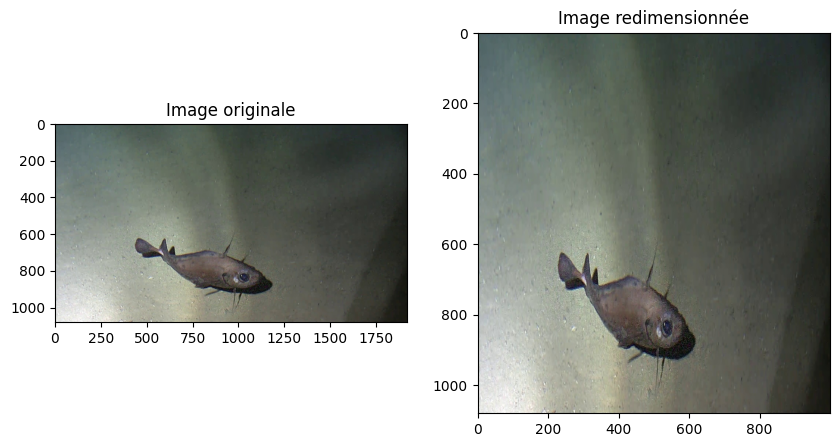

In [ ]:
from skimage import io
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt

# Charger une image à partir du dossier où vous avez extrait les images
image_path = 'image_171.jpg'
image = io.imread(image_path)

# Appliquer l'algorithme de seam carving pour réduire la largeur de l'image
new_width = 1000  # Nouvelle largeur de l'image
resized_image = transform.resize(image, (image.shape[0], new_width))

# Afficher l'image originale
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image originale')

# Afficher l'image redimensionnée
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Image redimensionnée')

plt.show()
